📦 Bibliotecas carregadas com sucesso!
🗓️ Data/Hora atual: 28/09/2025 22:12:09
🎯 INICIANDO TESTE COMPLETO DAS APIs GOVERNAMENTAIS
✅ Coletor inicializado com sucesso!

🔍 TESTANDO CONECTIVIDADE COM AS APIs...
✅ Câmara dos Deputados: ONLINE
✅ Portal da Transparência: ONLINE (requer token para dados)
✅ TSE Portal de Dados: ONLINE

👥 COLETANDO DADOS DE DEPUTADOS (limite: 30)...
✅ Coletados 30 deputados
📊 Colunas disponíveis: ['id', 'uri', 'nome', 'siglaPartido', 'uriPartido', 'siglaUf', 'idLegislatura', 'urlFoto', 'email']

📈 ESTATÍSTICAS:
   • Partidos únicos: 12
   • Estados únicos: 18
   • Top 5 partidos: {'REPUBLICANOS': 6, 'PP': 6, 'PT': 4, 'MDB': 3, 'PL': 3}

💰 COLETANDO GASTOS (amostra de 8 deputados)...
   📋 Processando: Albuquerque (REPUBLICANOS-RR)
      💸 R$ 0.00 (0 despesas)
   📋 Processando: Allan Garcês (PP-MA)
      💸 R$ 3,103.07 (11 despesas)
   📋 Processando: Alexandre Guimarães (MDB-TO)
      💸 R$ 4,442.75 (10 despesas)
   📋 Processando: Amanda Gentil (PP-MA)
      💸 R$ 0.0

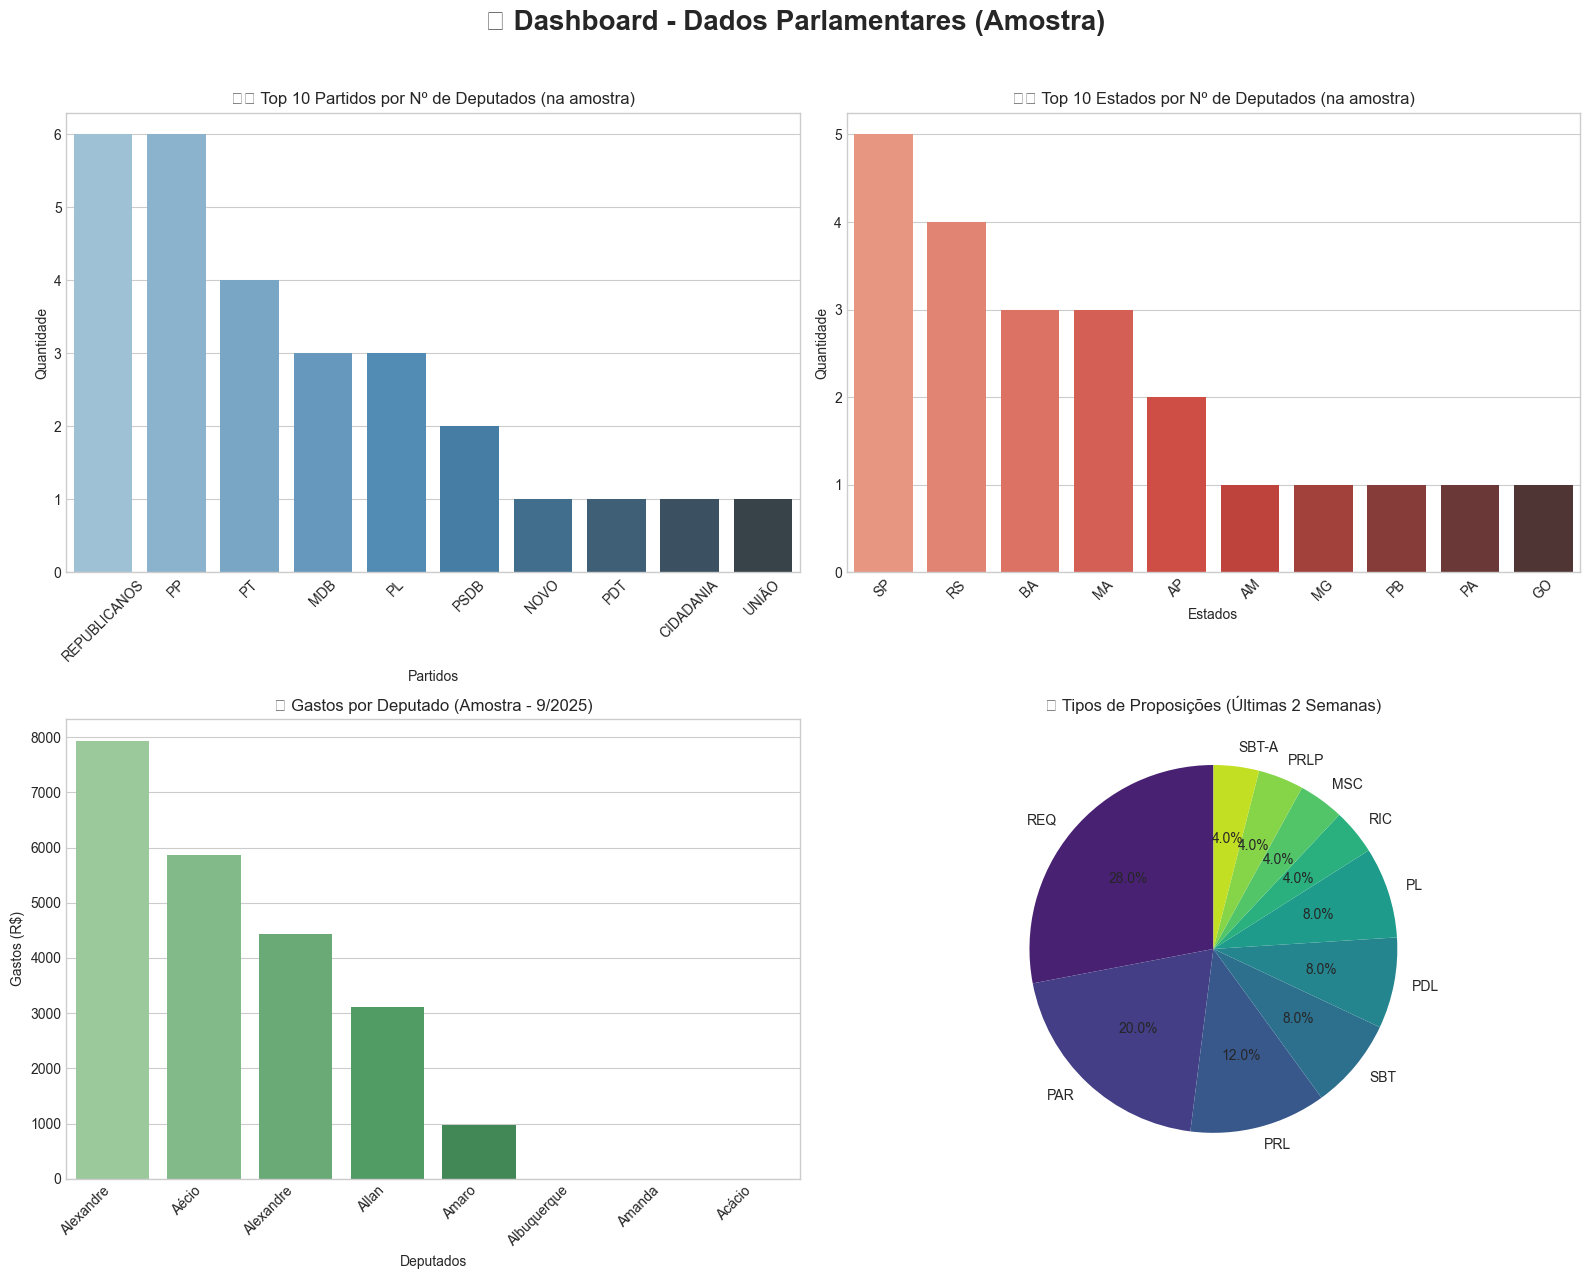


📋 EXIBINDO TABELAS DOS DADOS COLETADOS...

👥 AMOSTRA DOS DEPUTADOS COLETADOS:
             nome siglaPartido siglaUf                              email
   Acácio Favacho          MDB      AP    dep.acaciofavacho@camara.leg.br
      Adail Filho REPUBLICANOS      AM       dep.adailfilho@camara.leg.br
  Adilson Barroso           PL      SP   dep.adilsonbarroso@camara.leg.br
     Adolfo Viana         PSDB      BA      dep.adolfoviana@camara.leg.br
  Adriana Ventura         NOVO      SP   dep.adrianaventura@camara.leg.br
 Adriano do Baldy           PP      GO   dep.adrianodobaldy@camara.leg.br
      Aécio Neves         PSDB      MG       dep.aecioneves@camara.leg.br
      Afonso Hamm           PP      RS       dep.afonsohamm@camara.leg.br
     Afonso Motta          PDT      RS      dep.afonsomotta@camara.leg.br
Aguinaldo Ribeiro           PP      PB dep.aguinaldoribeiro@camara.leg.br

💰 GASTOS DOS DEPUTADOS (AMOSTRA):
                 nome      partido  total_gastos  qtd_despesas mes_refer

In [1]:
# -*- coding: utf-8 -*-
"""
Este notebook demonstra como coletar dados das principais APIs governamentais brasileiras:
- Câmara dos Deputados
- Portal da Transparência
- TSE (Tribunal Superior Eleitoral)
- Senado Federal

"""

# Commented out IPython magic to ensure Python compatibility.
# %%capture
# !pip install requests pandas plotly matplotlib seaborn

import requests
import pandas as pd
import json
from datetime import datetime, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

# Imports para visualização
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    plotly_available = True
except ImportError:
    plotly_available = False
    print("⚠️ Plotly não disponível. Usando apenas matplotlib.")

print("📦 Bibliotecas carregadas com sucesso!")
print(f"🗓️ Data/Hora atual: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")

"""
## 🔧 Classe Principal para Coleta de Dados
"""

class ColetorDadosGov:
    """
    Classe para coletar dados das APIs governamentais brasileiras
    """

    def __init__(self):
        """Inicializa o coletor com as URLs base das APIs"""
        self.apis = {
            'camara': 'https://dadosabertos.camara.leg.br/api/v2',
            'senado': 'https://www12.senado.leg.br/dados-abertos',
            'tse': 'https://dadosabertos.tse.jus.br',
            'transparencia': 'https://api.portaldatransparencia.gov.br/api-de-dados'
        }

        self.session = requests.Session()
        self.session.headers.update({
            'User-Agent': 'DeputadosMonitor/1.0 (Teste-Colab)',
            'Accept': 'application/json'
        })

        self.resultados = {}
        print("✅ Coletor inicializado com sucesso!")

    def testar_conectividade(self):
        """Testa conectividade com todas as APIs"""
        print("\n🔍 TESTANDO CONECTIVIDADE COM AS APIs...")
        print("=" * 50)

        status_apis = {}

        # Teste Câmara dos Deputados
        try:
            response = self.session.get(f"{self.apis['camara']}/deputados", timeout=10)
            if response.status_code == 200:
                status_apis['Câmara'] = "✅ ONLINE"
                print("✅ Câmara dos Deputados: ONLINE")
            else:
                status_apis['Câmara'] = f"⚠️ Status: {response.status_code}"
                print(f"⚠️ Câmara dos Deputados: Status {response.status_code}")
        except Exception as e:
            status_apis['Câmara'] = f"❌ ERRO: {str(e)[:50]}"
            print(f"❌ Câmara dos Deputados: ERRO - {str(e)[:50]}")

        # Teste Portal da Transparência (sem token)
        try:
            response = self.session.get(f"{self.apis['transparencia']}/orgaos", timeout=10)
            if response.status_code in [200, 401, 403]:  # 401/403 = precisa token mas API funciona
                status_apis['Transparência'] = "✅ ONLINE (requer token)"
                print("✅ Portal da Transparência: ONLINE (requer token para dados)")
            else:
                status_apis['Transparência'] = f"⚠️ Status: {response.status_code}"
                print(f"⚠️ Portal da Transparência: Status {response.status_code}")
        except Exception as e:
            status_apis['Transparência'] = f"❌ ERRO: {str(e)[:50]}"
            print(f"❌ Portal da Transparência: ERRO - {str(e)[:50]}")

        # Teste TSE (página principal)
        try:
            response = self.session.get(self.apis['tse'], timeout=10)
            if response.status_code == 200:
                status_apis['TSE'] = "✅ ONLINE"
                print("✅ TSE Portal de Dados: ONLINE")
            else:
                status_apis['TSE'] = f"⚠️ Status: {response.status_code}"
                print(f"⚠️ TSE Portal de Dados: Status {response.status_code}")
        except Exception as e:
            status_apis['TSE'] = f"❌ ERRO: {str(e)[:50]}"
            print(f"❌ TSE Portal de Dados: ERRO - {str(e)[:50]}")

        return status_apis

    def coletar_deputados(self, limite=20):
        """Coleta lista de deputados federais"""
        print(f"\n👥 COLETANDO DADOS DE DEPUTADOS (limite: {limite})...")
        print("=" * 50)

        try:
            url = f"{self.apis['camara']}/deputados"
            params = {'ordem': 'ASC', 'ordenarPor': 'nome', 'itens': limite}

            response = self.session.get(url, params=params, timeout=15)
            response.raise_for_status()

            dados = response.json()
            deputados = dados.get('dados', [])

            # Processar dados
            deputados_df = pd.DataFrame(deputados)

            print(f"✅ Coletados {len(deputados)} deputados")
            print(f"📊 Colunas disponíveis: {list(deputados_df.columns)}")

            # Estatísticas básicas
            if not deputados_df.empty:
                print(f"\n📈 ESTATÍSTICAS:")
                print(f"   • Partidos únicos: {deputados_df['siglaPartido'].nunique()}")
                print(f"   • Estados únicos: {deputados_df['siglaUf'].nunique()}")
                print(f"   • Top 5 partidos: {deputados_df['siglaPartido'].value_counts().head().to_dict()}")

            self.resultados['deputados'] = deputados_df
            return deputados_df

        except Exception as e:
            print(f"❌ Erro ao coletar deputados: {e}")
            return pd.DataFrame()

    def coletar_gastos_amostra(self, deputados_df, max_deputados=5):
        """Coleta gastos de uma amostra de deputados"""
        print(f"\n💰 COLETANDO GASTOS (amostra de {max_deputados} deputados)...")
        print("=" * 50)

        if deputados_df.empty:
            print("❌ Sem dados de deputados para processar")
            return pd.DataFrame()

        gastos_dados = []
        data_atual = datetime.now()
        ano_atual = data_atual.year
        mes_atual = data_atual.month

        # Pegar amostra aleatória
        amostra = deputados_df.sample(n=min(max_deputados, len(deputados_df)))

        for idx, deputado in amostra.iterrows():
            try:
                print(f"   📋 Processando: {deputado['nome']} ({deputado['siglaPartido']}-{deputado['siglaUf']})")

                # --- CÓDIGO CORRIGIDO AQUI ---
                # A API espera os parâmetros 'ano' e 'mes' separadamente.
                url = f"{self.apis['camara']}/deputados/{deputado['id']}/despesas"
                params = {
                    'ano': ano_atual,
                    'mes': mes_atual,
                    'ordem': 'ASC',
                    'itens': 100 # Pegar até 100 despesas no mês
                }

                response = self.session.get(url, params=params, timeout=10)

                if response.status_code == 200:
                    dados = response.json()
                    despesas = dados.get('dados', [])

                    total_gastos = sum(float(d.get('valorLiquido', 0)) for d in despesas)

                    gastos_dados.append({
                        'id': deputado['id'],
                        'nome': deputado['nome'],
                        'partido': deputado['siglaPartido'],
                        'uf': deputado['siglaUf'],
                        'total_gastos': total_gastos,
                        'qtd_despesas': len(despesas),
                        'mes_referencia': f"{mes_atual}/{ano_atual}"
                    })

                    print(f"      💸 R$ {total_gastos:,.2f} ({len(despesas)} despesas)")
                else:
                    print(f"      ⚠️ Status {response.status_code} - {response.text}")

                # Rate limiting
                time.sleep(0.5)

            except Exception as e:
                print(f"      ❌ Erro: {str(e)[:50]}")
                continue

        gastos_df = pd.DataFrame(gastos_dados)

        if not gastos_df.empty:
            print(f"\n📊 RESUMO DOS GASTOS:")
            print(f"   • Total coletado: R$ {gastos_df['total_gastos'].sum():,.2f}")
            print(f"   • Média por deputado: R$ {gastos_df['total_gastos'].mean():,.2f}")
            print(f"   • Maior gasto: R$ {gastos_df['total_gastos'].max():,.2f} (em {gastos_df.loc[gastos_df['total_gastos'].idxmax()]['nome']})")
            print(f"   • Menor gasto: R$ {gastos_df['total_gastos'].min():,.2f}")

        self.resultados['gastos'] = gastos_df
        return gastos_df

    def coletar_proposicoes_recentes(self, dias=7, limite=20):
        """Coleta proposições recentes"""
        print(f"\n📜 COLETANDO PROPOSIÇÕES DOS ÚLTIMOS {dias} DIAS (limite: {limite})...")
        print("=" * 50)

        try:
            data_fim = datetime.now()
            data_inicio = data_fim - timedelta(days=dias)

            url = f"{self.apis['camara']}/proposicoes"
            params = {
                'dataInicio': data_inicio.strftime('%Y-%m-%d'),
                'dataFim': data_fim.strftime('%Y-%m-%d'),
                'ordem': 'DESC',
                'ordenarPor': 'id',
                'itens': limite
            }

            response = self.session.get(url, params=params, timeout=15)
            response.raise_for_status()

            dados = response.json()
            proposicoes = dados.get('dados', [])

            proposicoes_df = pd.DataFrame(proposicoes)

            print(f"✅ Coletadas {len(proposicoes)} proposições")

            if not proposicoes_df.empty:
                print(f"📊 Tipos de proposições: {proposicoes_df['siglaTipo'].value_counts().to_dict()}")

            self.resultados['proposicoes'] = proposicoes_df
            return proposicoes_df

        except Exception as e:
            print(f"❌ Erro ao coletar proposições: {e}")
            return pd.DataFrame()

    def gerar_relatorio_completo(self):
        """Gera relatório completo dos dados coletados"""
        print("\n📋 RELATÓRIO COMPLETO DOS DADOS COLETADOS")
        print("=" * 60)

        for nome, df in self.resultados.items():
            print(f"\n📊 {nome.upper()}:")
            if not df.empty:
                print(f"   • Registros: {len(df)}")
                print(f"   • Colunas: {len(df.columns)}")
                print(f"   • Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")
            else:
                print("   • Nenhum dado coletado")

        return self.resultados

"""
## 🚀 Executando a Coleta de Dados
"""

print("🎯 INICIANDO TESTE COMPLETO DAS APIs GOVERNAMENTAIS")
print("=" * 60)

# Inicializar coletor
coletor = ColetorDadosGov()

# 1. Testar conectividade
status_apis = coletor.testar_conectividade()

# 2. Coletar deputados
deputados_df = coletor.coletar_deputados(limite=30)

# 3. Coletar gastos de amostra
if not deputados_df.empty:
    gastos_df = coletor.coletar_gastos_amostra(deputados_df, max_deputados=8)
else:
    gastos_df = pd.DataFrame()

# 4. Coletar proposições recentes
proposicoes_df = coletor.coletar_proposicoes_recentes(dias=14, limite=25)

# 5. Gerar relatório
resultados = coletor.gerar_relatorio_completo()

"""
## 📈 Visualização dos Dados Coletados
"""

print("\n🎨 GERANDO VISUALIZAÇÕES DOS DADOS...")
print("=" * 50)

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8-whitegrid') # Um estilo visualmente mais agradável
sns.set_palette("viridis")

# Figura com múltiplos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 13))
fig.suptitle('📊 Dashboard - Dados Parlamentares (Amostra)', fontsize=20, fontweight='bold')

# 1. Distribuição por partido
if not deputados_df.empty:
    partido_counts = deputados_df['siglaPartido'].value_counts().head(10)
    sns.barplot(x=partido_counts.index, y=partido_counts.values, ax=axes[0,0], palette="Blues_d")
    axes[0,0].set_title('🏛️ Top 10 Partidos por Nº de Deputados (na amostra)', fontsize=12)
    axes[0,0].set_xlabel('Partidos', fontsize=10)
    axes[0,0].set_ylabel('Quantidade', fontsize=10)
    axes[0,0].tick_params(axis='x', rotation=45)
else:
    axes[0,0].text(0.5, 0.5, 'Dados de deputados\nnão disponíveis',
                   ha='center', va='center', transform=axes[0,0].transAxes)
    axes[0,0].set_title('🏛️ Deputados por Partido')

# 2. Distribuição por estado
if not deputados_df.empty:
    uf_counts = deputados_df['siglaUf'].value_counts().head(10)
    sns.barplot(x=uf_counts.index, y=uf_counts.values, ax=axes[0,1], palette="Reds_d")
    axes[0,1].set_title('🗺️ Top 10 Estados por Nº de Deputados (na amostra)', fontsize=12)
    axes[0,1].set_xlabel('Estados', fontsize=10)
    axes[0,1].set_ylabel('Quantidade', fontsize=10)
    axes[0,1].tick_params(axis='x', rotation=45)
else:
    axes[0,1].text(0.5, 0.5, 'Dados de deputados\nnão disponíveis',
                   ha='center', va='center', transform=axes[0,1].transAxes)
    axes[0,1].set_title('🗺️ Deputados por Estado')

# 3. Gastos por deputado
if not gastos_df.empty and gastos_df['total_gastos'].sum() > 0:
    gastos_sorted = gastos_df.sort_values('total_gastos', ascending=False)
    sns.barplot(x='nome', y='total_gastos', data=gastos_sorted, ax=axes[1,0], palette="Greens_d")
    axes[1,0].set_title(f'💰 Gastos por Deputado (Amostra - {gastos_df["mes_referencia"].iloc[0]})', fontsize=12)
    axes[1,0].set_xlabel('Deputados', fontsize=10)
    axes[1,0].set_ylabel('Gastos (R$)', fontsize=10)
    # Exibe apenas o primeiro nome para não poluir o eixo
    axes[1,0].set_xticklabels([nome.split()[0] for nome in gastos_sorted['nome']], rotation=45, ha="right")
else:
    axes[1,0].text(0.5, 0.5, 'Dados de gastos\nnão disponíveis ou zerados',
                   ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('💰 Gastos por Deputado')

# 4. Tipos de proposições
if not proposicoes_df.empty:
    tipo_counts = proposicoes_df['siglaTipo'].value_counts()
    axes[1,1].pie(tipo_counts.values, labels=tipo_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(tipo_counts)))
    axes[1,1].set_title('📜 Tipos de Proposições (Últimas 2 Semanas)', fontsize=12)
    axes[1,1].set_ylabel('') # Remove o label 'None' do y
else:
    axes[1,1].text(0.5, 0.5, 'Dados de proposições\nnão disponíveis',
                   ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('📜 Tipos de Proposições')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta o layout para o supertítulo
plt.show()


"""
## 📊 Tabelas de Dados Coletados
"""

print("\n📋 EXIBINDO TABELAS DOS DADOS COLETADOS...")
print("=" * 50)

# Mostrar amostra dos deputados
if not deputados_df.empty:
    print("\n👥 AMOSTRA DOS DEPUTADOS COLETADOS:")
    display_cols = ['nome', 'siglaPartido', 'siglaUf', 'email']
    available_cols = [col for col in display_cols if col in deputados_df.columns]
    print(deputados_df[available_cols].head(10).to_string(index=False))
else:
    print("\n👥 DEPUTADOS: Nenhum dado coletado")

# Mostrar gastos
if not gastos_df.empty:
    print("\n💰 GASTOS DOS DEPUTADOS (AMOSTRA):")
    display_cols = ['nome', 'partido', 'total_gastos', 'qtd_despesas', 'mes_referencia']
    print(gastos_df[display_cols].sort_values('total_gastos', ascending=False).to_string(index=False, float_format='{:.2f}'.format))
else:
    print("\n💰 GASTOS: Nenhum dado coletado")

# Mostrar proposições
if not proposicoes_df.empty:
    print("\n📜 PROPOSIÇÕES RECENTES (AMOSTRA):")
    display_cols = ['siglaTipo', 'numero', 'ano', 'ementa']
    available_cols = [col for col in display_cols if col in proposicoes_df.columns]
    if available_cols:
        sample_data = proposicoes_df[available_cols].head(5).copy() # Usar .copy() para evitar SettingWithCopyWarning
        # Truncar ementa se muito longa
        if 'ementa' in sample_data.columns:
            sample_data['ementa'] = sample_data['ementa'].str.slice(0, 100) + '...'
        print(sample_data.to_string(index=False))
else:
    print("\n📜 PROPOSIÇÕES: Nenhum dado coletado")

"""
## 💾 Salvando Dados Coletados
"""

print("\n💾 SALVANDO DADOS EM ARQUIVOS CSV...")
print("=" * 50)

arquivos_salvos = []
timestamp = datetime.now().strftime('%Y%m%d_%H%M')

# Salvar deputados
if not deputados_df.empty:
    filename = f"deputados_coletados_{timestamp}.csv"
    deputados_df.to_csv(filename, index=False, encoding='utf-8-sig')
    arquivos_salvos.append(filename)
    print(f"✅ Deputados salvos em: {filename}")

# Salvar gastos
if not gastos_df.empty:
    filename = f"gastos_deputados_{timestamp}.csv"
    gastos_df.to_csv(filename, index=False, encoding='utf-8-sig')
    arquivos_salvos.append(filename)
    print(f"✅ Gastos salvos em: {filename}")

# Salvar proposições
if not proposicoes_df.empty:
    filename = f"proposicoes_recentes_{timestamp}.csv"
    proposicoes_df.to_csv(filename, index=False, encoding='utf-8-sig')
    arquivos_salvos.append(filename)
    print(f"✅ Proposições salvas em: {filename}")

if not arquivos_salvos:
    print("⚠️ Nenhum arquivo foi salvo (sem dados coletados)")

"""
## 📋 Resumo Final e Próximos Passos
"""

print("\n🎯 RESUMO FINAL DO TESTE")
print("=" * 60)

print("\n✅ APIs TESTADAS:")
for api, status in status_apis.items():
    print(f"   • {api}: {status}")

print("\n📊 DADOS COLETADOS:")
for nome, df in resultados.items():
    if not df.empty:
        print(f"   • {nome.capitalize()}: {len(df)} registros")
    else:
        print(f"   • {nome.capitalize()}: 0 registros")

if arquivos_salvos:
    print("\n💾 ARQUIVOS GERADOS:")
    for arquivo in arquivos_salvos:
        print(f"   • {arquivo}")

print("\n🚀 PRÓXIMOS PASSOS RECOMENDADOS:")
print("   1. ✅ APIs funcionais - pronto para desenvolvimento")
print("   2. 🔧 Implementar coleta automática e agendada (ex: GitHub Actions, Cloud Functions)")
print("   3. 🏗️ Criar banco de dados para armazenar histórico (ex: SQLite, PostgreSQL)")
print("   4. 📊 Desenvolver dashboard interativo (ex: com Plotly, Streamlit ou Dash)")
print("   5. 🤖 Integrar LLM para análise de ementas e impacto de PLs")
print("   6. 📈 Implementar sistema de score/ranking de produtividade e gastos")

print("\n🎉 TESTE CONCLUÍDO COM SUCESSO!")
print("=" * 60)